In [201]:
# import autosklearn.regression
import sklearn.model_selection
import sklearn.metrics
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [202]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<h2>02 Data Collection</h2>

In [203]:
df = []
src = r"C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\train\train"
for file in os.listdir(src):
    df.append(pd.read_csv(os.path.join(src,file)))
for i in df:
    print(list(i))
df = pd.concat(df)
df = df.fillna(0)
df[-10:]

['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน', '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1']
['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh', '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed', '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณ

index                time  1Air Humidity  1AirTemperature  1LightHigh  \
104  12_105  04:40:16.090733+00           44.1             31.2         0.0   
105  12_106  04:42:16.132055+00           44.2             31.2         0.0   
106  12_107  04:44:16.107327+00           45.2             30.8         0.0   
107  12_108   04:46:16.11276+00           45.9             32.0         0.0   
108  12_109  04:48:16.120498+00           41.4             33.1         0.0   
109  12_110  04:50:16.123489+00           43.0             33.0         0.0   
110  12_111  04:52:18.185763+00           42.5             32.5         0.0   
111  12_112  04:54:16.141528+00           41.7             33.1         0.0   
112  12_113  04:56:20.078654+00            0.0              0.0         0.0   
113  12_114  04:58:16.116687+00           44.8             32.5         0.0   

     1LightLow  11Rain Accumulate (mm)  11Rain count  12WindSpeed  \
104      47.64                     0.0           0.0          0.5   
105      49.50                     0.0           0.0          0.1   
106      50.03                     0.0           0.0          1.2   
107      50.06                     0.0           0.0          0.6   
108      50.36                     0.0           0.0          0.7   
109      52.30                     0.0           0.0          1.0   
110      53.76                     0.0           0.0          0.8   
111      54.86                     0.0           0.0          0.8   
112       0.00                     0.0           0.0          0.0   
113      58.81                     0.0           0.0          1.2   

     13WindDirection  23SoilWC ค.ชื้นดิน  23SoilTemp.อุณหภูมิดิน  23SoilEC  \
104              3.0                38.8                    22.8      0.11   
105              1.0                36.9                    22.8      0.11   
106              7.0                37.4                    22.8      0.11   
107              1.0                36.9                    22.8      0.11   
108              7.0                37.6                    22.8      0.11   
109              5.0                36.9                    22.8      0.11   
110              4.0                37.4                    22.8      0.11   
111              4.0                37.4                    22.8      0.11   
112              2.0                36.9                    22.8      0.11   
113              7.0                37.4                    22.8      0.11   

     23SoilpH   26N   26P   26K  29SoilTension  flow1  
104       5.0  21.0  95.0  87.0          105.0    0.0  
105       5.0  21.0  95.0  87.0          111.0    0.0  
106       5.0  21.0  95.0  87.0          113.0    0.0  
107       5.0  21.0  95.0  87.0          110.0    0.0  
108       5.0  21.0  95.0  87.0          108.0    0.0  
109       5.0  21.0  95.0  87.0          109.0    0.0  
110       5.0  21.0  95.0  87.0            0.0    0.0  
111       5.1  21.0  95.0  87.0          109.0    0.0  
112       5.0  21.0  95.0  87.0          104.0    0.0  
113       5.1  21.0  95.0  87.0          113.0    0.0

In [204]:
df.shape

(1340, 19)

In [205]:
df.columns

Index(['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh',
       '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed',
       '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน',
       '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1'],
      dtype='object')

In [206]:
df.describe(include='all')

index                time  1Air Humidity  1AirTemperature   1LightHigh  \
count   1340                1340    1340.000000      1340.000000  1340.000000   
unique  1340                1340            NaN              NaN          NaN   
top     01_1  01:00:50.174233+00            NaN              NaN          NaN   
freq       1                   1            NaN              NaN          NaN   
mean     NaN                 NaN      48.565149        28.975373    21.761828   
std      NaN                 NaN      11.594615         4.606203    30.873723   
min      NaN                 NaN       0.000000         0.000000     0.000000   
25%      NaN                 NaN      41.800000        25.900000     0.000000   
50%      NaN                 NaN      45.700000        29.600000     0.000000   
75%      NaN                 NaN      52.725000        32.300000    65.530000   
max      NaN                 NaN      97.300000        38.400000    65.530000   

          1LightLow  11Rain Accumulate (mm)  11Rain count  12WindSpeed  \
count   1340.000000                  1340.0        1340.0  1340.000000   
unique          NaN                     NaN           NaN          NaN   
top             NaN                     NaN           NaN          NaN   
freq            NaN                     NaN           NaN          NaN   
mean      27.479515                     0.0           0.0     0.751045   
std       24.924393                     0.0           0.0     0.746727   
min        0.000000                     0.0           0.0     0.000000   
25%        5.475000                     0.0           0.0     0.100000   
50%       11.005000                     0.0           0.0     0.600000   
75%       55.992500                     0.0           0.0     1.100000   
max       65.520000                     0.0           0.0     5.000000   

        13WindDirection  23SoilWC ค.ชื้นดิน  23SoilTemp.อุณหภูมิดิน  \
count       1340.000000         1340.000000             1340.000000   
unique              NaN                 NaN                     NaN   
top                 NaN                 NaN                     NaN   
freq                NaN                 NaN                     NaN   
mean           2.914179           34.977164               21.970224   
std            2.202777           19.713135                1.738520   
min            0.000000            0.000000                0.000000   
25%            1.000000           31.400000               21.500000   
50%            2.000000           36.900000               22.000000   
75%            4.000000           42.500000               23.100000   
max            7.000000           80.200000               23.700000   

           23SoilEC     23SoilpH          26N          26P          26K  \
count   1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.118567     6.512910    20.721642    89.968657    83.330597   
std        0.019267     1.240398     7.396645    30.364609    28.248795   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.110000     5.000000    21.000000    94.000000    87.000000   
50%        0.110000     7.000000    22.000000    97.000000    89.000000   
75%        0.120000     7.400000    23.000000   100.000000    93.000000   
max        0.210000     8.300000    33.000000   123.000000   116.000000   

        29SoilTension        flow1  
count     1340.000000  1340.000000  
unique            NaN          NaN  
top               NaN          NaN  
freq              NaN          NaN  
mean        40.767164     0.403731  
std         31.291224     0.490828  
min          0.000000     0.000000  
25%         23.000000     0.000000  
50%         29.000000     0.000000  
75%         52.000000

<hr>

<h4>03 Exploratory Data Analysis (EDA)</h4>

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 113
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1340 non-null   object 
 1   time                    1340 non-null   object 
 2   1Air Humidity           1340 non-null   float64
 3   1AirTemperature         1340 non-null   float64
 4   1LightHigh              1340 non-null   float64
 5   1LightLow               1340 non-null   float64
 6   11Rain Accumulate (mm)  1340 non-null   float64
 7   11Rain count            1340 non-null   float64
 8   12WindSpeed             1340 non-null   float64
 9   13WindDirection         1340 non-null   float64
 10  23SoilWC ค.ชื้นดิน      1340 non-null   float64
 11  23SoilTemp.อุณหภูมิดิน  1340 non-null   float64
 12  23SoilEC                1340 non-null   float64
 13  23SoilpH                1340 non-null   float64
 14  26N                     1340 non-null   float6

In [209]:
df.describe().T

count       mean        std  min     25%     50%  \
1Air Humidity           1340.0  48.565149  11.594615  0.0  41.800  45.700   
1AirTemperature         1340.0  28.975373   4.606203  0.0  25.900  29.600   
1LightHigh              1340.0  21.761828  30.873723  0.0   0.000   0.000   
1LightLow               1340.0  27.479515  24.924393  0.0   5.475  11.005   
11Rain Accumulate (mm)  1340.0   0.000000   0.000000  0.0   0.000   0.000   
11Rain count            1340.0   0.000000   0.000000  0.0   0.000   0.000   
12WindSpeed             1340.0   0.751045   0.746727  0.0   0.100   0.600   
13WindDirection         1340.0   2.914179   2.202777  0.0   1.000   2.000   
23SoilWC ค.ชื้นดิน      1340.0  34.977164  19.713135  0.0  31.400  36.900   
23SoilTemp.อุณหภูมิดิน  1340.0  21.970224   1.738520  0.0  21.500  22.000   
23SoilEC                1340.0   0.118567   0.019267  0.0   0.110   0.110   
23SoilpH                1340.0   6.512910   1.240398  0.0   5.000   7.000   
26N                     1340.0  20.721642   7.396645  0.0  21.000  22.000   
26P                     1340.0  89.968657  30.364609  0.0  94.000  97.000   
26K                     1340.0  83.330597  28.248795  0.0  87.000  89.000   
29SoilTension           1340.0  40.767164  31.291224  0.0  23.000  29.000   
flow1                   1340.0   0.403731   0.490828  0.0   0.000   0.000   

                             75%     max  
1Air Humidity            52.7250   97.30  
1AirTemperature          32.3000   38.40  
1LightHigh               65.5300   65.53  
1LightLow                55.9925   65.52  
11Rain Accumulate (mm)    0.0000    0.00  
11Rain count              0.0000    0.00  
12WindSpeed               1.1000    5.00  
13WindDirection           4.0000    7.00  
23SoilWC ค.ชื้นดิน       42.5000   80.20  
23SoilTemp.อุณหภูมิดิน   23.1000   23.70  
23SoilEC                  0.1200    0.21  
23SoilpH                  7.4000    8.30  
26N                      23.0000   33.00  
26P                     100.0000  123.00  
26K                      93.0000  116.00  
29SoilTension            52.0000  123.00  
flow1                     1.0000    1.00

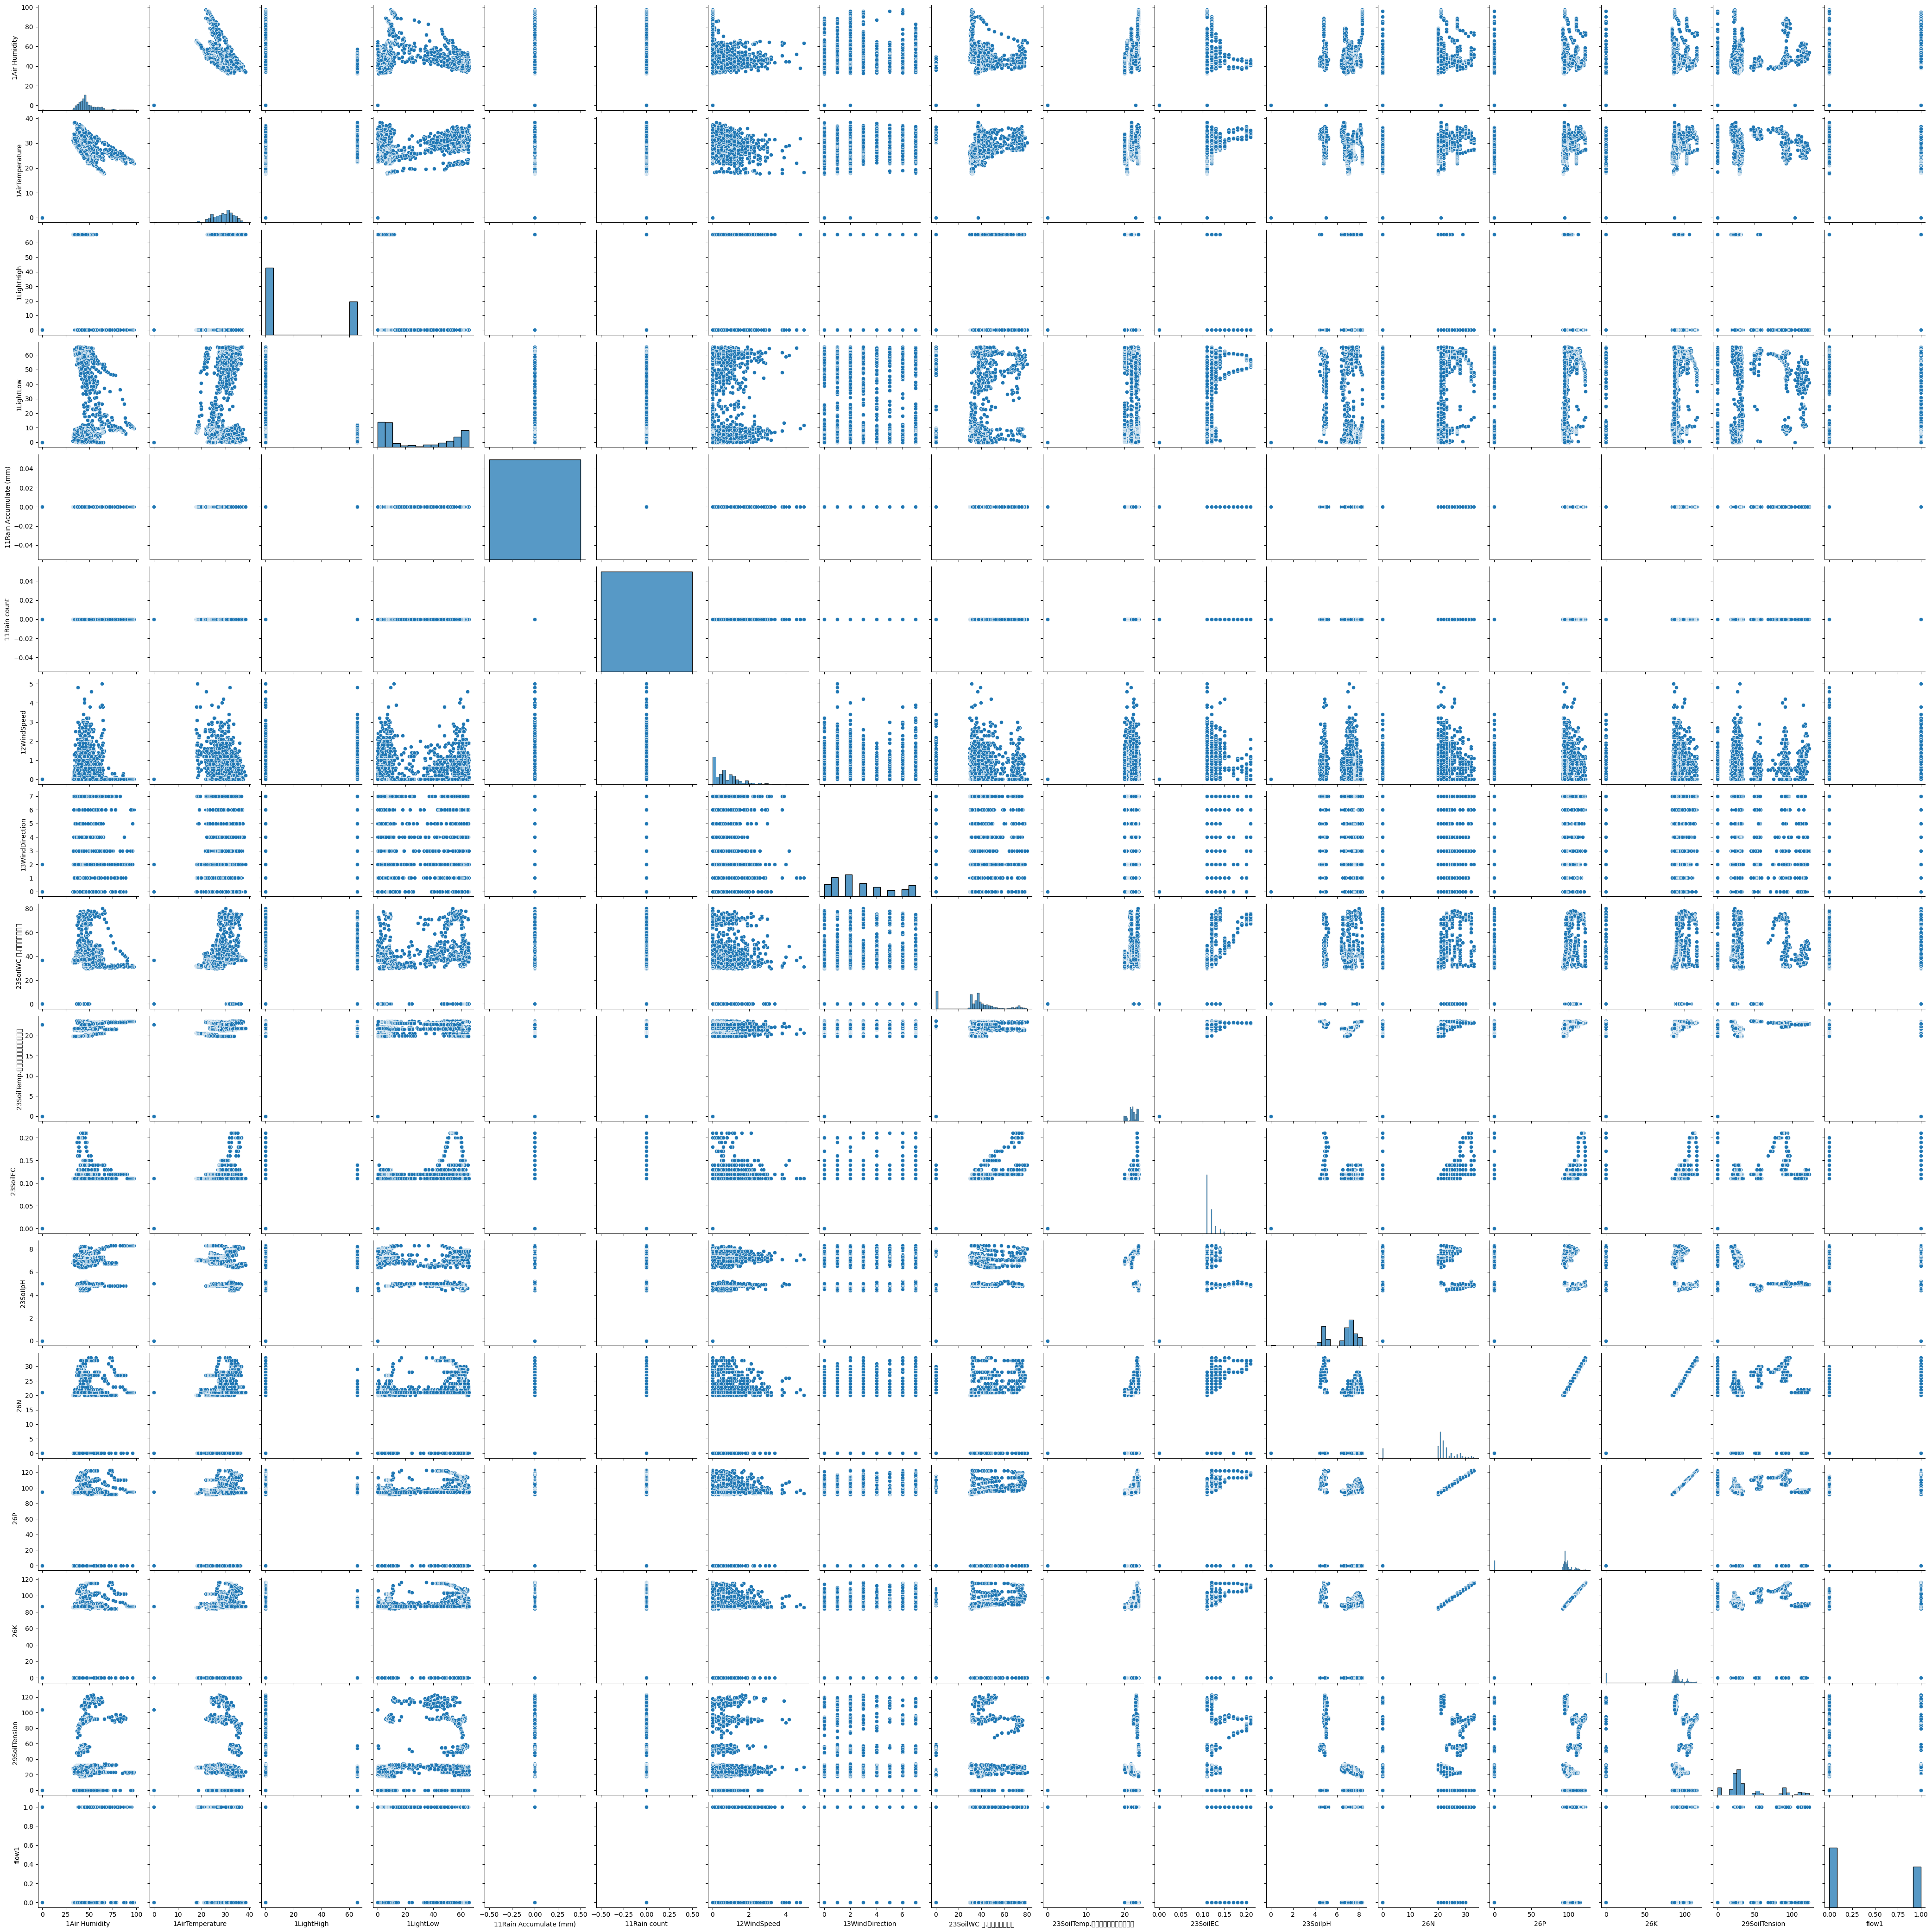

In [210]:
# Pair Plot
sns.pairplot(df)
plt.show()

In [211]:
def remove_outliers(df):
    cleaned_data = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

In [212]:
# Remove outliers from the dataset
df = remove_outliers(df)
df

index                time  1Air Humidity  1AirTemperature  1LightHigh  \
49    01_50  02:40:50.233795+00           48.0             32.3         0.0   
50    01_51  02:42:50.232726+00           45.7             33.0         0.0   
51    01_52  02:44:50.259068+00           44.8             34.4         0.0   
52    01_53  02:46:50.262598+00           45.5             34.4         0.0   
53    01_54  02:48:50.243586+00           47.3             34.2         0.0   
..      ...                 ...            ...              ...         ...   
45    12_46  02:42:17.949209+00           47.4             30.0         0.0   
62    12_63  03:16:18.076134+00           46.9             29.5         0.0   
86    12_87  04:04:18.052941+00           46.3             30.4         0.0   
103  12_104   04:38:18.06256+00           45.0             31.0         0.0   
110  12_111  04:52:18.185763+00           42.5             32.5         0.0   

     1LightLow  11Rain Accumulate (mm)  11Rain count  12WindSpeed  \
49       62.16                     0.0           0.0          0.0   
50       61.97                     0.0           0.0          0.0   
51       62.74                     0.0           0.0          0.0   
52       63.44                     0.0           0.0          0.0   
53       63.31                     0.0           0.0          0.0   
..         ...                     ...           ...          ...   
45       53.43                     0.0           0.0          0.9   
62       44.12                     0.0           0.0          0.6   
86       48.35                     0.0           0.0          1.7   
103      45.51                     0.0           0.0          0.6   
110      53.76                     0.0           0.0          0.8   

     13WindDirection  23SoilWC ค.ชื้นดิน  23SoilTemp.อุณหภูมิดิน  23SoilEC  \
49               2.0                58.5                    23.4      0.12   
50               4.0                57.9                    23.3      0.12   
51               2.0                53.3                    23.4      0.12   
52               3.0                52.1                    23.4      0.12   
53               2.0                52.3                    23.4      0.12   
..               ...                 ...                     ...       ...   
45               7.0                49.3                    23.0      0.12   
62               2.0                42.2                    22.9      0.12   
86               2.0                37.4                    22.9      0.12   
103              6.0                36.9                    22.9      0.11   
110              4.0                37.4                    22.8      0.11   

     23SoilpH   26N    26P   26K  29SoilTension  flow1  
49        7.8  25.0  104.0  97.0           22.0    0.0  
50        7.8  25.0  103.0  96.0           21.0    0.0  
51        7.8  25.0  103.0  96.0           21.0    0.0  
52        7.8  24.0  103.0  96.0           21.0    0.0  
53        7.9  24.0  103.0  96.0           21.0    0.0  
..        ...   ...    ...   ...            ...    ...  
45        4.9  22.0   97.0  90.0            0.0    1.0  
62        4.9  21.0   96.0  89.0            0.0    0.0  
86        5.0  21.0   95.0  88.0            0.0    0.0  
103       5.0  21.0   95.0  87.0            0.0    0.0  
110       5.0  21.0   95.0  87.0            0.0    0.0  

[640 rows x 19 columns]

In [213]:
df.describe().T

count       mean        std    min     25%    50%  \
1Air Humidity           640.0  47.439844   8.974610  32.30  39.500  46.70   
1AirTemperature         640.0  28.195938   4.574723  17.70  24.675  28.15   
1LightHigh              640.0  28.874156  32.558607   0.00   0.000   0.00   
1LightLow               640.0  18.574016  23.055588   0.00   3.065   7.21   
11Rain Accumulate (mm)  640.0   0.000000   0.000000   0.00   0.000   0.00   
11Rain count            640.0   0.000000   0.000000   0.00   0.000   0.00   
12WindSpeed             640.0   0.694844   0.639680   0.00   0.100   0.60   
13WindDirection         640.0   3.023438   2.236645   0.00   1.000   3.00   
23SoilWC ค.ชื้นดิน      640.0  37.990000   5.703607  29.80  34.600  37.00   
23SoilTemp.อุณหภูมิดิน  640.0  21.475625   1.024091  19.90  20.500  21.60   
23SoilEC                640.0   0.112016   0.004279   0.11   0.110   0.11   
23SoilpH                640.0   7.028281   0.692389   4.80   6.900   7.10   
26N                     640.0  21.500000   1.300054  20.00  21.000  21.00   
26P                     640.0  96.356250   2.977425  92.00  94.000  96.00   
26K                     640.0  89.000000   3.048897  84.00  87.000  89.00   
29SoilTension           640.0  27.462500  16.546662   0.00  23.000  27.00   
flow1                   640.0   0.309375   0.462598   0.00   0.000   0.00   

                            75%     max  
1Air Humidity           53.7000   69.10  
1AirTemperature         31.4000   38.40  
1LightHigh              65.5300   65.53  
1LightLow               24.8625   65.52  
11Rain Accumulate (mm)   0.0000    0.00  
11Rain count             0.0000    0.00  
12WindSpeed              1.1000    2.60  
13WindDirection          5.0000    7.00  
23SoilWC ค.ชื้นดิน      40.4000   58.70  
23SoilTemp.อุณหภูมิดิน  22.0000   23.50  
23SoilEC                 0.1100    0.13  
23SoilpH                 7.3000    8.20  
26N                     22.0000   26.00  
26P                     98.0000  106.00  
26K                     91.0000   99.00  
29SoilTension           30.0000   93.00  
flow1                    1.0000    1.00

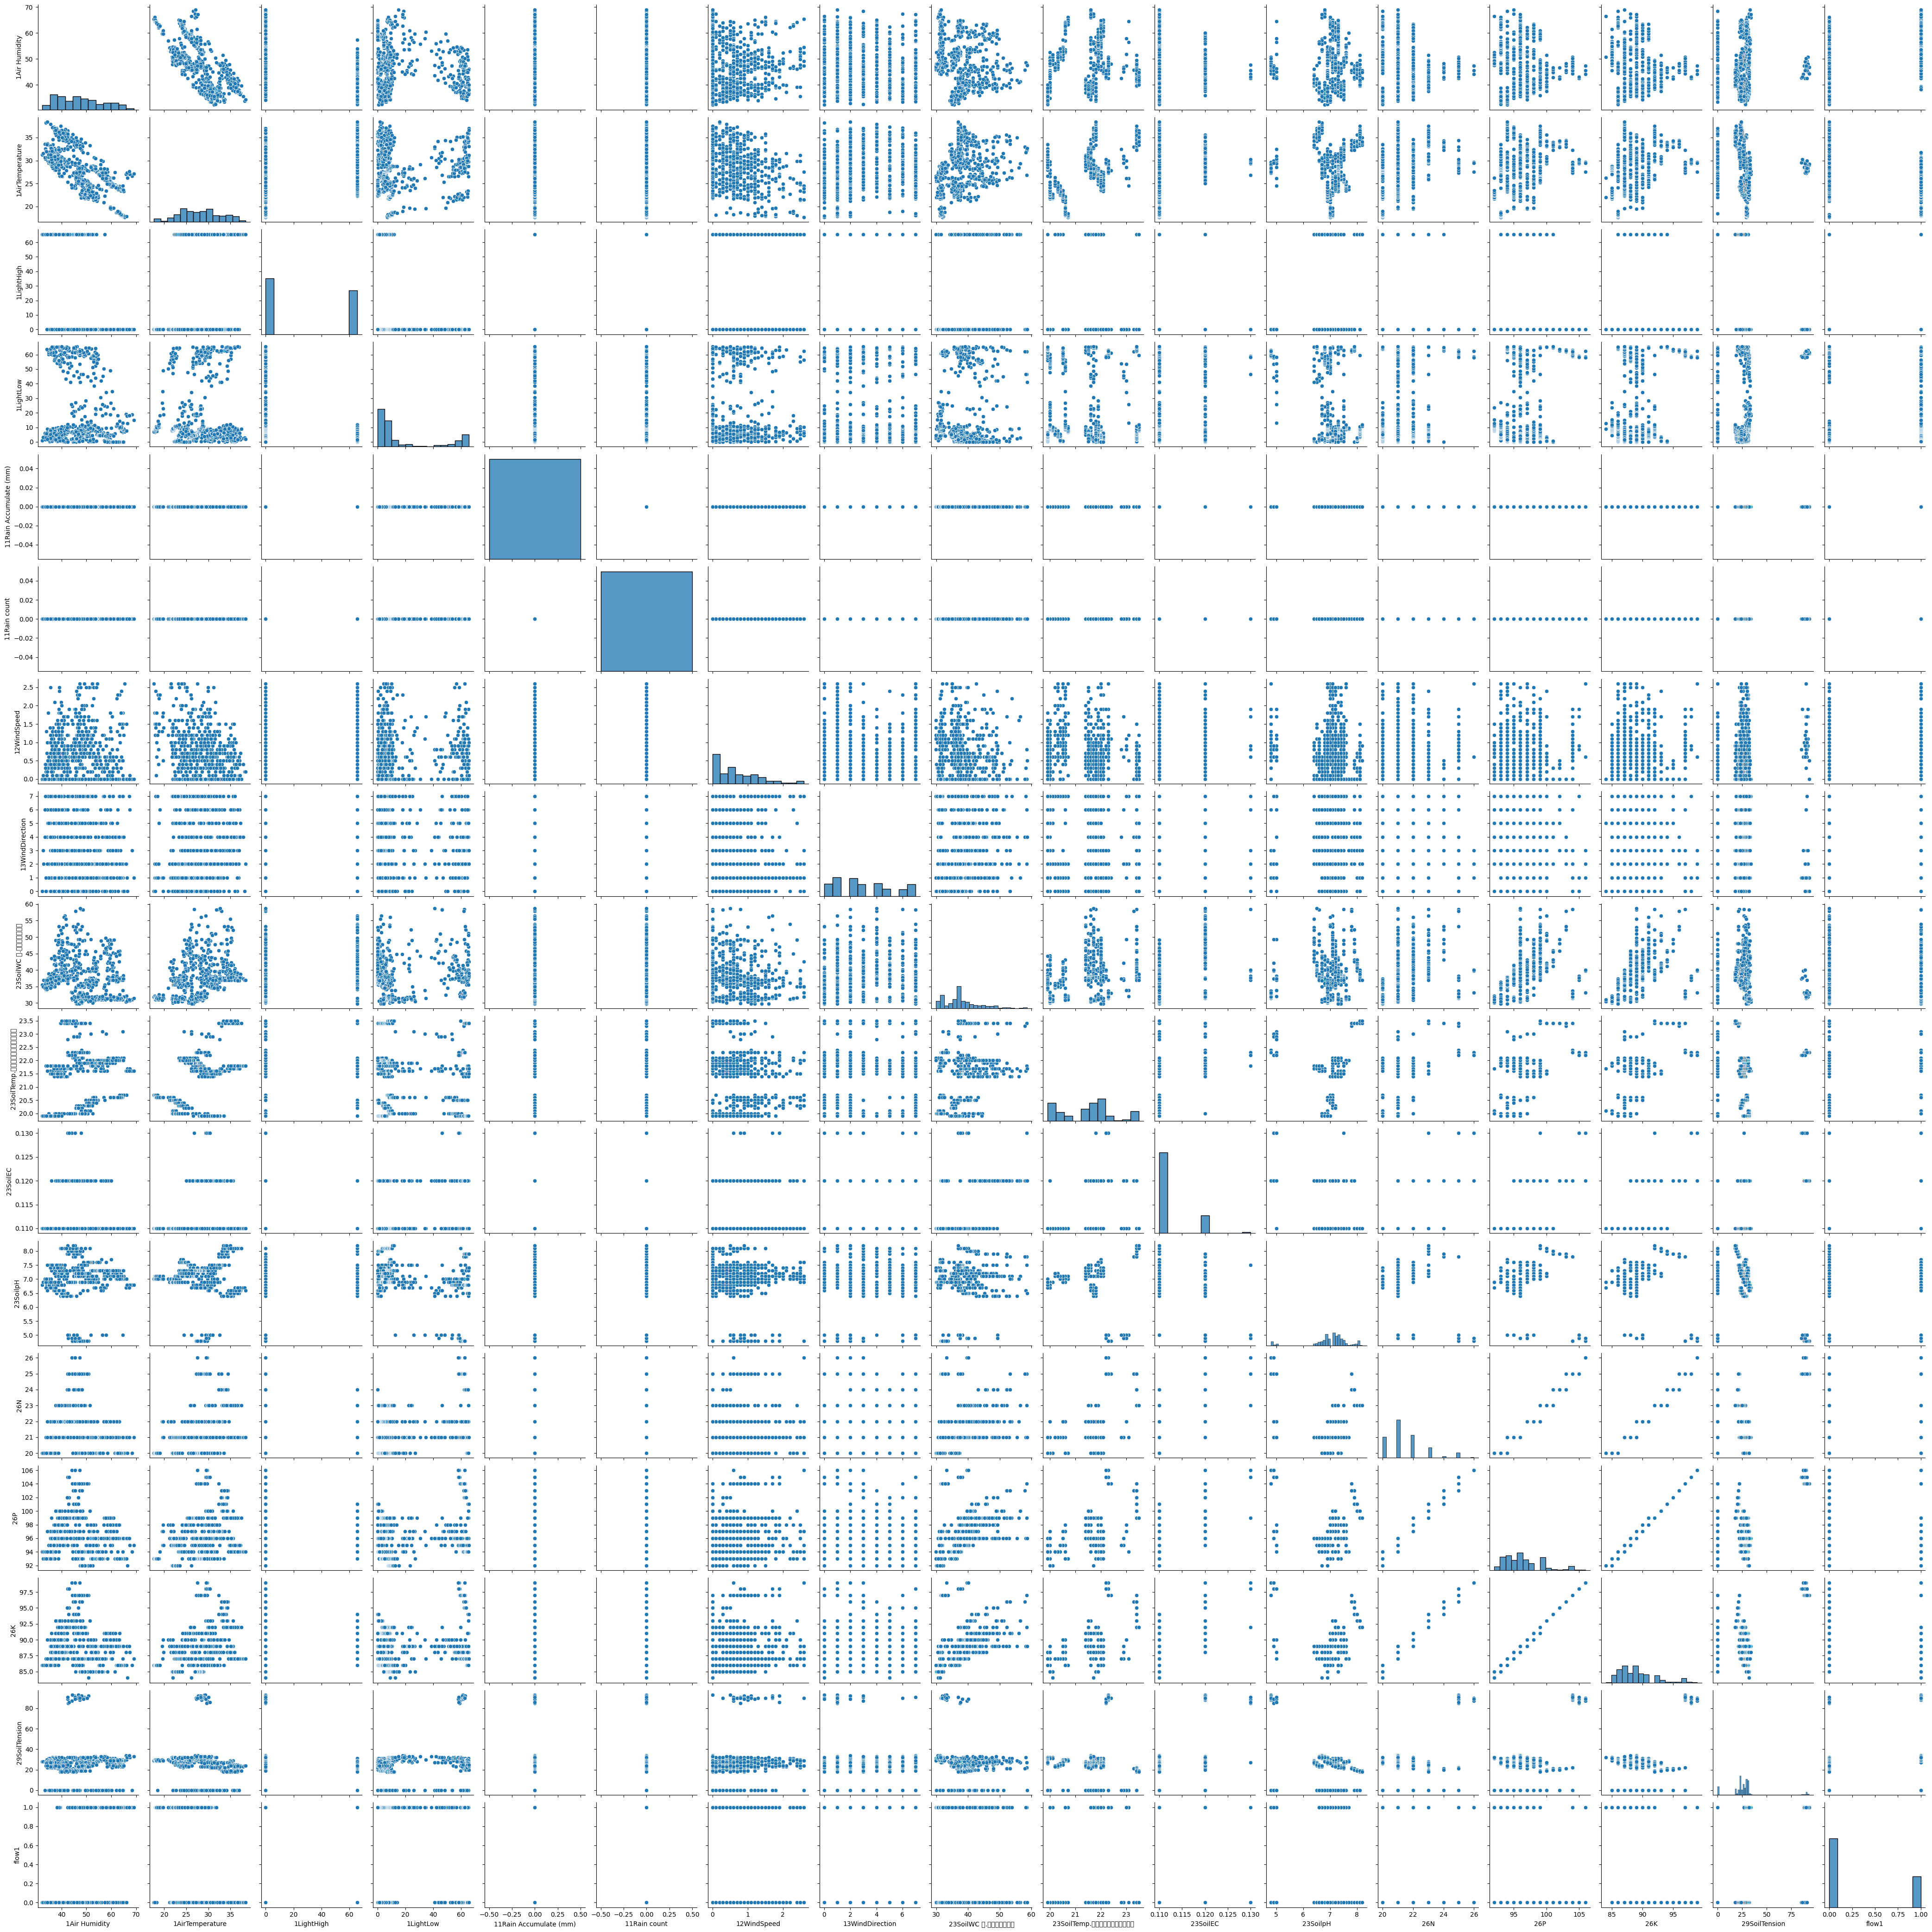

In [214]:
# Pair Plot
sns.pairplot(df)
plt.show()

<h4>04 Feature Engineering</h4>

In [215]:
df.columns

Index(['index', 'time', '1Air Humidity', '1AirTemperature', '1LightHigh',
       '1LightLow', '11Rain Accumulate (mm)', '11Rain count', '12WindSpeed',
       '13WindDirection', '23SoilWC ค.ชื้นดิน', '23SoilTemp.อุณหภูมิดิน',
       '23SoilEC', '23SoilpH', '26N', '26P', '26K', '29SoilTension', 'flow1'],
      dtype='object')

In [216]:
df

index                time  1Air Humidity  1AirTemperature  1LightHigh  \
49    01_50  02:40:50.233795+00           48.0             32.3         0.0   
50    01_51  02:42:50.232726+00           45.7             33.0         0.0   
51    01_52  02:44:50.259068+00           44.8             34.4         0.0   
52    01_53  02:46:50.262598+00           45.5             34.4         0.0   
53    01_54  02:48:50.243586+00           47.3             34.2         0.0   
..      ...                 ...            ...              ...         ...   
45    12_46  02:42:17.949209+00           47.4             30.0         0.0   
62    12_63  03:16:18.076134+00           46.9             29.5         0.0   
86    12_87  04:04:18.052941+00           46.3             30.4         0.0   
103  12_104   04:38:18.06256+00           45.0             31.0         0.0   
110  12_111  04:52:18.185763+00           42.5             32.5         0.0   

     1LightLow  11Rain Accumulate (mm)  11Rain count  12WindSpeed  \
49       62.16                     0.0           0.0          0.0   
50       61.97                     0.0           0.0          0.0   
51       62.74                     0.0           0.0          0.0   
52       63.44                     0.0           0.0          0.0   
53       63.31                     0.0           0.0          0.0   
..         ...                     ...           ...          ...   
45       53.43                     0.0           0.0          0.9   
62       44.12                     0.0           0.0          0.6   
86       48.35                     0.0           0.0          1.7   
103      45.51                     0.0           0.0          0.6   
110      53.76                     0.0           0.0          0.8   

     13WindDirection  23SoilWC ค.ชื้นดิน  23SoilTemp.อุณหภูมิดิน  23SoilEC  \
49               2.0                58.5                    23.4      0.12   
50               4.0                57.9                    23.3      0.12   
51               2.0                53.3                    23.4      0.12   
52               3.0                52.1                    23.4      0.12   
53               2.0                52.3                    23.4      0.12   
..               ...                 ...                     ...       ...   
45               7.0                49.3                    23.0      0.12   
62               2.0                42.2                    22.9      0.12   
86               2.0                37.4                    22.9      0.12   
103              6.0                36.9                    22.9      0.11   
110              4.0                37.4                    22.8      0.11   

     23SoilpH   26N    26P   26K  29SoilTension  flow1  
49        7.8  25.0  104.0  97.0           22.0    0.0  
50        7.8  25.0  103.0  96.0           21.0    0.0  
51        7.8  25.0  103.0  96.0           21.0    0.0  
52        7.8  24.0  103.0  96.0           21.0    0.0  
53        7.9  24.0  103.0  96.0           21.0    0.0  
..        ...   ...    ...   ...            ...    ...  
45        4.9  22.0   97.0  90.0            0.0    1.0  
62        4.9  21.0   96.0  89.0            0.0    0.0  
86        5.0  21.0   95.0  88.0            0.0    0.0  
103       5.0  21.0   95.0  87.0            0.0    0.0  
110       5.0  21.0   95.0  87.0            0.0    0.0  

[640 rows x 19 columns]

<h5>Feature Importance</h5>

In [217]:
df.shape

(640, 19)

In [218]:
dfx = df
list(dfx)

['index',
 'time',
 '1Air Humidity',
 '1AirTemperature',
 '1LightHigh',
 '1LightLow',
 '11Rain Accumulate (mm)',
 '11Rain count',
 '12WindSpeed',
 '13WindDirection',
 '23SoilWC ค.ชื้นดิน',
 '23SoilTemp.อุณหภูมิดิน',
 '23SoilEC',
 '23SoilpH',
 '26N',
 '26P',
 '26K',
 '29SoilTension',
 'flow1']

In [219]:
dfx = dfx.drop(['index','time','11Rain Accumulate (mm)','11Rain count'],axis=1)

In [220]:
dfx.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [221]:
x = {'1Air Humidity':-0.1601,
'1AirTemperature':0.3111,
'1LightHigh':0.06379,
'1LightLow':0.1204,
'12WindSpeed':-0.1083,
'13WindDirection':0.08821,
'23SoilWC ค.ชื้นดิน':1,
'23SoilTemp.อุณหภูมิดิน':0.2677,
'23SoilEC':0.4955,
'23SoilpH':0.1313,
'26N':0.3578,
'26P':0.4464,
'26K':0.426,
'29SoilTension':-0.1967,
'flow1':-0.2115,
}
# Sort the dictionary by its values
sorted_x = dict(sorted(x.items(), key=lambda item: item[-1],reverse=True))

sorted_x

{'23SoilWC ค.ชื้นดิน': 1,
 '23SoilEC': 0.4955,
 '26P': 0.4464,
 '26K': 0.426,
 '26N': 0.3578,
 '1AirTemperature': 0.3111,
 '23SoilTemp.อุณหภูมิดิน': 0.2677,
 '23SoilpH': 0.1313,
 '1LightLow': 0.1204,
 '13WindDirection': 0.08821,
 '1LightHigh': 0.06379,
 '12WindSpeed': -0.1083,
 '1Air Humidity': -0.1601,
 '29SoilTension': -0.1967,
 'flow1': -0.2115}

In [222]:
# ['index',
#  'time',
#  '1Air Humidity',
#  '1AirTemperature',
#  '1LightHigh',
#  '1LightLow',
#  '11Rain Accumulate (mm)',
#  '11Rain count',
#  '12WindSpeed',
#  '13WindDirection',
#  '23SoilWC ค.ชื้นดิน',
#  '23SoilTemp.อุณหภูมิดิน',
#  '23SoilEC',
#  '23SoilpH',
#  '26N',
#  '26P',
#  '26K',
#  '29SoilTension',
#  'flow1']

In [223]:
'23SoilEC','26P','26K','26N','1AirTemperature','23SoilTemp.อุณหภูมิดิน','23SoilpH','1LightLow'

('23SoilEC',
 '26P',
 '26K',
 '26N',
 '1AirTemperature',
 '23SoilTemp.อุณหภูมิดิน',
 '23SoilpH',
 '1LightLow')

In [224]:
# X = dfx[['1Air Humidity', '1AirTemperature', '1LightHigh',
#                 '1LightLow','12WindSpeed',
#                 '23SoilEC', '23SoilpH', '23SoilTemp.อุณหภูมิดิน',  '26N', '26P', '26K',
#                 '29SoilTension', 'flow1']]

X = dfx[['23SoilEC','26P','26K','26N','1AirTemperature','23SoilTemp.อุณหภูมิดิน','23SoilpH','1LightLow']]     
 

y = df[['23SoilWC ค.ชื้นดิน']]

In [225]:
X

23SoilEC    26P   26K   26N  1AirTemperature  23SoilTemp.อุณหภูมิดิน  \
49       0.12  104.0  97.0  25.0             32.3                    23.4   
50       0.12  103.0  96.0  25.0             33.0                    23.3   
51       0.12  103.0  96.0  25.0             34.4                    23.4   
52       0.12  103.0  96.0  24.0             34.4                    23.4   
53       0.12  103.0  96.0  24.0             34.2                    23.4   
..        ...    ...   ...   ...              ...                     ...   
45       0.12   97.0  90.0  22.0             30.0                    23.0   
62       0.12   96.0  89.0  21.0             29.5                    22.9   
86       0.12   95.0  88.0  21.0             30.4                    22.9   
103      0.11   95.0  87.0  21.0             31.0                    22.9   
110      0.11   95.0  87.0  21.0             32.5                    22.8   

     23SoilpH  1LightLow  
49        7.8      62.16  
50        7.8      61.97  
51        7.8      62.74  
52        7.8      63.44  
53        7.9      63.31  
..        ...        ...  
45        4.9      53.43  
62        4.9      44.12  
86        5.0      48.35  
103       5.0      45.51  
110       5.0      53.76  

[640 rows x 8 columns]

In [226]:
y

23SoilWC ค.ชื้นดิน
49                 58.5
50                 57.9
51                 53.3
52                 52.1
53                 52.3
..                  ...
45                 49.3
62                 42.2
86                 37.4
103                36.9
110                37.4

[640 rows x 1 columns]

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.046, random_state = 99)
X_train.shape, X_test.shape

((610, 8), (30, 8))

<h4>Scaling?</h4>

In [229]:
from sklearn.preprocessing import RobustScaler

In [230]:
cols = X_train.columns

In [231]:
X_train

23SoilEC   26P   26K   26N  1AirTemperature  23SoilTemp.อุณหภูมิดิน  \
78       0.11  98.0  90.0  22.0             32.0                    21.6   
20       0.12  99.0  91.0  22.0             25.6                    21.9   
45       0.12  97.0  90.0  22.0             30.0                    23.0   
103      0.11  95.0  87.0  21.0             31.0                    22.9   
87       0.11  95.0  87.0  21.0             36.0                    21.7   
..        ...   ...   ...   ...              ...                     ...   
98       0.11  96.0  89.0  21.0             32.7                    21.5   
7        0.11  94.0  87.0  21.0             24.6                    22.0   
64       0.12  98.0  91.0  22.0             29.3                    21.4   
86       0.11  96.0  89.0  21.0             29.8                    21.4   
87       0.11  99.0  92.0  23.0             35.5                    23.4   

     23SoilpH  1LightLow  
78        7.4       4.57  
20        7.5      28.38  
45        4.9      53.43  
103       5.0      45.51  
87        6.5      64.64  
..        ...        ...  
98        7.4       3.89  
7         7.6       9.87  
64        7.1       7.81  
86        7.3      65.31  
87        8.1       6.59  

[610 rows x 8 columns]

In [232]:
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [233]:
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])

<hr>

<h4>05 Model Selection</h4>

In [234]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from pygam import LinearGAM, s, f
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [235]:
# 07 Decision Tree Regression
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), dt_param_grid, cv=5, scoring='neg_mean_absolute_error')
dt_grid_search.fit(X_train, y_train)
dt_best = dt_grid_search.best_estimator_
dt_predictions = dt_best.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f'Decision Tree MSE: {dt_mae}, Best Params: {dt_grid_search.best_params_}')

#####################################################################################################################################
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error

# # Expanded hyperparameter grid
# dt_param_grid = {
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 10, 20, 30],
#     'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required at each leaf node
#     'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
#     'ccp_alpha': [0.0, 0.01, 0.1]  # Complexity parameter used for Minimal Cost-Complexity Pruning
# }

# # Grid Search with Cross-Validation
# dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='neg_mean_absolute_error')
# dt_grid_search.fit(X_train, y_train)

# # Best model and predictions
# dt_best = dt_grid_search.best_estimator_
# dt_predictions = dt_best.predict(X_test)

# # Evaluate performance
# dt_mae = mean_absolute_error(y_test, dt_predictions)
# print(f'Decision Tree MAE: {dt_mae}, Best Params: {dt_grid_search.best_params_}')



Decision Tree MSE: 1.0201335978835988, Best Params: {'max_depth': 20, 'min_samples_split': 10}


In [236]:
# 08 Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
rfr_grid_search = GridSearchCV(rfr, rfr_param_grid, cv=5, scoring='neg_mean_absolute_error')
rfr_grid_search.fit(X_train, y_train)
rfr_best = rfr_grid_search.best_estimator_
rfr_predictions = rfr_best.predict(X_test)
rfr_mae = mean_absolute_error(y_test, rfr_predictions)
print("Random Forest Regressor mae:", rfr_mae)

#####################################################################################################################################
# # Enhanced hyperparameter grid
# rfr_param_grid = {
#     'n_estimators': [100, 200, 300],  # More options for the number of trees
#     'max_depth': [None, 5, 10, 20],  # Additional depth options for tree growth
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
# }

# # Grid Search with Cross-Validation
# rfr_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rfr_param_grid, cv=5, scoring='neg_mean_absolute_error')
# rfr_grid_search.fit(X_train, y_train)

# # Best model and predictions
# rfr_best = rfr_grid_search.best_estimator_
# rfr_predictions = rfr_best.predict(X_test)

# # Evaluate performance
# rfr_mae = mean_absolute_error(y_test, rfr_predictions)
# print(f'Random Forest Regressor MAE: {rfr_mae}, Best Params: {rfr_grid_search.best_params_}')


Random Forest Regressor mae: 0.8815280555555483


In [237]:
# 09 Gradient Boosting Regression (XGBoost)
import xgboost as xgb

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9]
}
xgb_grid_search = GridSearchCV(xgb.XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
xgb_grid_search.fit(X_train, y_train)
xgb_best = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost MSE: {xgb_mae}, Best Params: {xgb_grid_search.best_params_}')
#####################################################################################################################################
# # Extended hyperparameter grid
# xgb_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 6, 9, 12],
#     'subsample': [0.6, 0.8, 1.0],  # Fraction of observations to be randomly sampled for each tree.
#     'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features to be randomly sampled for each tree.
#     'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node.
# }

# # Grid Search with Cross-Validation
# xgb_grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
# xgb_grid_search.fit(X_train, y_train)

# # Best model and predictions
# xgb_best = xgb_grid_search.best_estimator_
# xgb_predictions = xgb_best.predict(X_test)

# # Evaluate performance
# xgb_mae = mean_absolute_error(y_test, xgb_predictions)
# print(f'XGBoost MAE: {xgb_mae}, Best Params: {xgb_grid_search.best_params_}')


XGBoost MSE: 0.9796604029337569, Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [238]:
# Gradient Boosting Regression Trees
gbrt = GradientBoostingRegressor()
gbrt_param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2]
    }
gbrt_grid_search = GridSearchCV(gbrt, gbrt_param_grid, cv=5, scoring='neg_mean_absolute_error')
gbrt_grid_search.fit(X_train, y_train)
gbrt_best = gbrt_grid_search.best_estimator_
gbrt_predictions = gbrt_best.predict(X_test)
gbrt_mae = mean_absolute_error(y_test, gbrt_predictions)
print(f"{gbrt_mae} Gradient Boosting Regression")


1.116698814475917 Gradient Boosting Regression


In [239]:
# 10 Gradient Boosting Regression (LightGBM)
import lightgbm as lgb


lgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 9],
    'num_leaves': [31, 62, 127]
}
lgb_grid_search = GridSearchCV(lgb.LGBMRegressor(), lgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
lgb_grid_search.fit(X_train, y_train)
lgb_best = lgb_grid_search.best_estimator_
lgb_predictions = lgb_best.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)

print(f"{lgb_mae} Gradient Boosting Regression")
# #####################################################################################################################################
# # Expanded hyperparameter grid
# lgb_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 6, 9, -1],
#     'num_leaves': [31, 62, 127, 255],
#     'min_child_samples': [20, 30, 40],  # Minimum number of data needed in a child (leaf)
#     'feature_fraction': [0.8, 0.9, 1.0],  # LightGBM will randomly select a subset of features on each iteration if feature_fraction is smaller than 1.0
#     'lambda_l1': [0, 1e-1, 1, 10],  # L1 regularization
#     'lambda_l2': [0, 1e-1, 1, 10]  # L2 regularization
# }

# # Grid Search with Cross-Validation
# lgb_grid_search = GridSearchCV(lgb.LGBMRegressor(random_state=42), lgb_param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
# lgb_grid_search.fit(X_train, y_train)

# # Best model and predictions
# lgb_best = lgb_grid_search.best_estimator_
# lgb_predictions = lgb_best.predict(X_test)

# # Evaluate performance
# lgb_mae = mean_absolute_error(y_test, lgb_predictions)
# print(f'LightGBM Gradient Boosting Regression MAE: {lgb_mae}, Best Params: {lgb_grid_search.best_params_}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 8
[LightGBM] [Info] Start training from score 37.890779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 8
[LightGBM] [Info] Start training from score 37.837295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 488, number of used features: 8
[LightGBM] [Info] Start training from score 37.884426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [240]:
# K-Nearest Neighbors Regression (KNN)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_absolute_error')
knn_grid_search.fit(X_train, y_train)
knn_best = knn_grid_search.best_estimator_
knn_predictions = knn_best.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f'KNN Regression MAE: {knn_mae}, Best Params: {knn_grid_search.best_params_}')

#####################################################################################################################################
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Optionally apply PCA for dimensionality reduction
# # pca = PCA(n_components='mle')  # mle lets PCA decide the number of components to keep
# # X_train_scaled = pca.fit_transform(X_train_scaled)
# # X_test_scaled = pca.transform(X_test_scaled)

# # Expanded hyperparameter grid
# knn_param_grid = {
#     'n_neighbors': range(1, 10),  # Consider testing a broader range of neighbors
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     # 'metric': ['euclidean', 'manhattan', 'minkowski'],  # Optional: Explore different distance metrics
# }

# # Grid Search with Cross-Validation
# knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_absolute_error')
# knn_grid_search.fit(X_train_scaled, y_train)

# # Best model and predictions
# knn_best = knn_grid_search.best_estimator_
# knn_predictions = knn_best.predict(X_test_scaled)

# # Evaluate performance
# knn_mae = mean_absolute_error(y_test, knn_predictions)
# print(f'KNN Regression MAE: {knn_mae}, Best Params: {knn_grid_search.best_params_}')


KNN Regression MAE: 1.3879370018955026, Best Params: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}


In [241]:
# # # 12 Neural Network Regression
# from sklearn.neural_network import MLPRegressor
# from sklearn.preprocessing import StandardScaler

# nn_param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50,50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['adam', 'lbfgs']
# }
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# nn_grid_search = GridSearchCV(MLPRegressor(max_iter=1000), nn_param_grid, cv=5, scoring='neg_mean_absolute_error')
# nn_grid_search.fit(X_train_scaled, y_train)
# nn_best = nn_grid_search.best_estimator_
# nn_predictions = nn_best.predict(X_test_scaled)
# nn_mae = mean_absolute_error(y_test, nn_predictions)
# print(f'Neural Network Regression MAE: {nn_mae}, Best Params: {nn_grid_search.best_params_}')

# #####################################################################################################################################
# # # Expanded hyperparameter grid
# # nn_param_grid = {
# #     'hidden_layer_sizes': [(50,), (100,), (50,50), (100, 100), (50, 100, 50)],
# #     'activation': ['relu', 'tanh', 'logistic'],
# #     'solver': ['adam', 'lbfgs'],
# #     'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter.
# #     'learning_rate_init': [0.001, 0.01, 0.1],  # The initial learning rate used.
# # }

# # # Scale features
# # scaler = StandardScaler().fit(X_train)
# # X_train_scaled = scaler.transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # # Early stopping setup
# # early_stopping = {'n_iter_no_change': 10, 'validation_fraction': 0.1, 'tol': 0.001}

# # # Grid Search with Cross-Validation
# # nn_grid_search = GridSearchCV(MLPRegressor(max_iter=1000, **early_stopping), nn_param_grid, cv=5, scoring='neg_mean_absolute_error')
# # nn_grid_search.fit(X_train_scaled, y_train)

# # # Best model and predictions
# # nn_best = nn_grid_search.best_estimator_
# # nn_predictions = nn_best.predict(X_test_scaled)

# # # Evaluate performance
# # nn_mae = mean_absolute_error(y_test, nn_predictions)
# # print(f'Neural Network Regression MAE: {nn_mae}, Best Params: {nn_grid_search.best_params_}')


In [242]:
# print(f'{lr_mae} Linear Regression MAE: ')
# print(f'{poly_mae} Polynomial Regression MSE: , Best Degree: {poly_grid_search.best_params_["polynomialfeatures__degree"]}')
# print(f'{ridge_mae} Ridge Regression MSE: , Best Alpha: {ridge_grid_search.best_params_["alpha"]}')
# print(f'{lasso_mae} Lasso Regression MSE: , Best Alpha: {lasso_grid_search.best_params_["alpha"]}')
# print(f"{enr_mae}Elastic Net Regression MSE:")
# print(f'{svr_mae} SVR MSE: , Best Params: {svr_grid_search.best_params_}')
print(f'{dt_mae} Decision Tree MSE: , Best Params: {dt_grid_search.best_params_}')
print(f"{rfr_mae} Random Forest Regressor mae:", )
print(f'{xgb_mae} XGBoost MSE: , Best Params: {xgb_grid_search.best_params_}')

print(f"{gbrt_mae} Gradient Boosting Regression2")
print(f"{lgb_mae} Gradient Boosting Regression2")

# print(f'{gpr_mae} Gaussian Process Regression MAE: ')
print(f'{knn_mae} Best KNN Model MAE:  Best Parameters: {knn_grid_search.best_params_}')
# print(f'{nn_mae} Neural Network Regression MAE: , Best Params: {nn_grid_search.best_params_}')
# print(f'{qr_mae} Quantile Regression MAE: ')
# print(f"{mlr_mae}Multiple Linear Regression MSE:")
# print(f"{gbrt_mae}Gradient Boosting Regression Trees MSE:")

1.0201335978835988 Decision Tree MSE: , Best Params: {'max_depth': 20, 'min_samples_split': 10}
0.8815280555555483 Random Forest Regressor mae:
0.9796604029337569 XGBoost MSE: , Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
1.116698814475917 Gradient Boosting Regression2
0.8902020178841515 Gradient Boosting Regression2
1.3879370018955026 Best KNN Model MAE:  Best Parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}


In [243]:
feature_bank = {
"Decision Tree":dt_mae,
"Random Forest Regressor":rfr_mae,
"XGBoost":xgb_mae,
"Gradient Boosting Regression":gbrt_mae,
"Gradient Boosting Regression2":lgb_mae,
"Best KNN Model":knn_mae,
# "Neural Network Regression":nn_mae,
}

In [244]:
feature_bank

{'Decision Tree': 1.0201335978835988,
 'Random Forest Regressor': 0.8815280555555483,
 'XGBoost': 0.9796604029337569,
 'Gradient Boosting Regression': 1.116698814475917,
 'Gradient Boosting Regression2': 0.8902020178841515,
 'Best KNN Model': 1.3879370018955026}

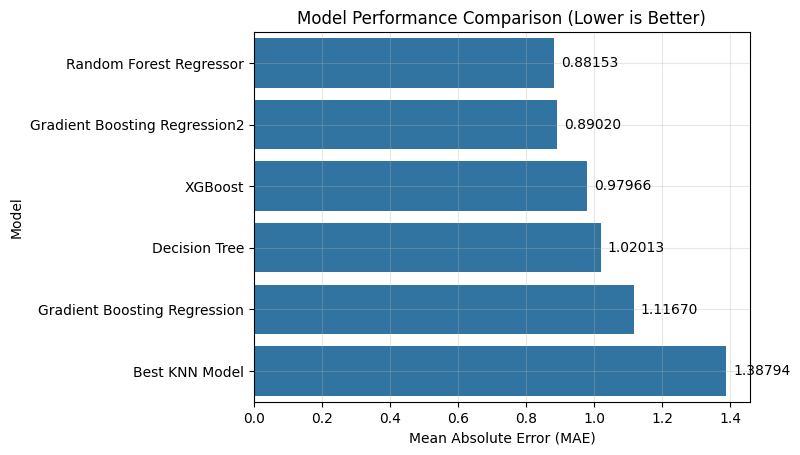

In [245]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(feature_bank.items()), columns=['Model', 'MAE'])

# Sort the DataFrame by MAE
df_sorted = df.sort_values('MAE')

# Create the bar plot
ax = sns.barplot(x='MAE', y='Model', data=df_sorted)

plt.title('Model Performance Comparison (Lower is Better)')
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Model')

# Loop over the bars and use plt.text() to display the MAE value on each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02,  # x-coordinate position of text
             p.get_y() + p.get_height() / 2,  # y-coordinate position of text
             '{:1.5f}'.format(width),  # Text to be displayed
             va='center')  # Center alignment of text

plt.grid(alpha=0.3)
plt.show()

<hr>

<h4>06 Model Training</h4>

In [246]:
x = []
src2 = r'C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test'
for file in os.listdir(src2):
    print(os.path.join(src2,file))
    x.append(pd.read_csv(os.path.join(src2,file)))
x = pd.concat(x)
x = x.fillna(0)
x

C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test\set02.csv
C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\test\test\set09.csv


index                time  1Air Humidity  1AirTemperature  1LightHigh  \
0      02_1  04:11:15.736838+00           46.2             30.7       65.53   
1      02_2  04:13:15.740386+00           46.0             31.4       65.53   
2      02_3  04:15:17.720768+00           44.4             32.2       65.53   
3      02_4  04:17:15.750584+00           43.0             33.0       65.53   
4      02_5   04:19:15.75123+00           42.4             32.9       65.53   
..      ...                 ...            ...              ...         ...   
111  09_112  07:20:44.482378+00           36.2             35.9        0.00   
112  09_113  07:22:46.459288+00           39.8             35.9        0.00   
113  09_114  07:24:44.482942+00           38.4             35.8        0.00   
114  09_115  07:26:44.533862+00           38.2             35.6        0.00   
115  09_116  07:28:44.505057+00           38.5             36.4        0.00   

     1LightLow  11Rain Accumulate (mm)  11Rain count  12WindSpeed  \
0         8.79                     0.0           0.0          1.3   
1         8.26                     0.0           0.0          0.0   
2         8.66                     0.0           0.0          1.0   
3         8.68                     0.0           0.0          0.0   
4         8.86                     0.0           0.0          0.0   
..         ...                     ...           ...          ...   
111      53.35                     0.0           0.0          0.0   
112      54.13                     0.0           0.0          1.9   
113      54.11                     0.0           0.0          0.0   
114      54.26                     0.0           0.0          0.0   
115      53.95                     0.0           0.0          0.3   

     13WindDirection  23SoilTemp.อุณหภูมิดิน  23SoilEC  23SoilpH   26N    26P  \
0                2.0                    22.4      0.11       7.9  21.0   95.0   
1                1.0                    22.4      0.11       7.9  21.0   95.0   
2                2.0                    22.3      0.11       7.9  21.0   95.0   
3                2.0                    22.4      0.11       7.9  21.0   95.0   
4                2.0                    22.4      0.11       7.9  21.0   95.0   
..               ...                     ...       ...       ...   ...    ...   
111              3.0                    23.7      0.12       4.9  27.0  110.0   
112              0.0                    23.7      0.12       4.9  27.0  110.0   
113              1.0                    23.7      0.12       4.9  27.0  110.0   
114              1.0                    23.7      0.12       4.9  27.0  110.0   
115              3.0                    23.7      0.12       4.9  27.0  110.0   

       26K  29SoilTension  flow1  
0     88.0           26.0    0.0  
1     88.0           26.0    0.0  
2     88.0            0.0    0.0  
3     88.0           26.0    0.0  
4     88.0           26.0    0.0  
..     ...            ...    ...  
111  103.0           48.0    0.0  
112  103.0            0.0    0.0  
113  103.0           48.0    0.0  
114  103.0           45.0    0.0  
115  103.0           48.0    0.0  

[229 rows x 18 columns]

In [247]:
X.columns

Index(['23SoilEC', '26P', '26K', '26N', '1AirTemperature',
       '23SoilTemp.อุณหภูมิดิน', '23SoilpH', '1LightLow'],
      dtype='object')

In [248]:
x = x[X.columns]
x

23SoilEC    26P    26K   26N  1AirTemperature  23SoilTemp.อุณหภูมิดิน  \
0        0.11   95.0   88.0  21.0             30.7                    22.4   
1        0.11   95.0   88.0  21.0             31.4                    22.4   
2        0.11   95.0   88.0  21.0             32.2                    22.3   
3        0.11   95.0   88.0  21.0             33.0                    22.4   
4        0.11   95.0   88.0  21.0             32.9                    22.4   
..        ...    ...    ...   ...              ...                     ...   
111      0.12  110.0  103.0  27.0             35.9                    23.7   
112      0.12  110.0  103.0  27.0             35.9                    23.7   
113      0.12  110.0  103.0  27.0             35.8                    23.7   
114      0.12  110.0  103.0  27.0             35.6                    23.7   
115      0.12  110.0  103.0  27.0             36.4                    23.7   

     23SoilpH  1LightLow  
0         7.9       8.79  
1         7.9       8.26  
2         7.9       8.66  
3         7.9       8.68  
4         7.9       8.86  
..        ...        ...  
111       4.9      53.35  
112       4.9      54.13  
113       4.9      54.11  
114       4.9      54.26  
115       4.9      53.95  

[229 rows x 8 columns]

In [249]:
# scaler = RobustScaler()
# x_test = scaler.fit_transform(x_test)
# x_test = scaler.transform(x_test)
# x_test = pd.DataFrame(x_test, columns=[cols])

In [250]:
y = rfr_best.predict(x)
y

array([35.0215, 34.966 , 34.9535, 34.999 , 34.999 , 34.918 , 34.9815,
       35.0225, 35.0245, 34.9895, 35.0025, 34.978 , 34.988 , 34.935 ,
       35.031 , 36.2815, 36.872 , 43.697 , 44.817 , 45.552 , 46.641 ,
       46.2215, 46.1765, 46.2575, 52.523 , 46.502 , 46.3045, 46.6665,
       46.866 , 34.9205, 46.2105, 34.6595, 51.842 , 53.736 , 51.5445,
       54.056 , 51.8795, 51.8985, 47.3835, 46.195 , 35.822 , 47.146 ,
       47.146 , 47.3835, 51.7345, 46.989 , 47.3235, 47.167 , 35.721 ,
       47.1875, 47.08  , 50.466 , 51.7275, 45.5405, 52.3825, 45.8405,
       45.456 , 45.5895, 45.3965, 52.549 , 36.025 , 48.944 , 32.7705,
       40.077 , 40.077 , 32.67  , 39.85  , 40.081 , 39.942 , 40.2535,
       39.9955, 40.4695, 41.4755, 41.885 , 42.169 , 42.093 , 39.7935,
       33.095 , 40.7395, 40.3415, 40.1535, 39.829 , 39.7855, 39.8405,
       39.8835, 39.9095, 39.1875, 41.1405, 40.715 , 40.685 , 40.7315,
       40.8405, 33.112 , 41.051 , 39.2575, 39.37  , 39.1795, 40.8405,
       32.6715, 32.6

In [251]:
len(y)

229

<hr>

<h4>07 Create SSV</h4>

In [252]:
submission = pd.read_csv(r'C:\Users\Acer\Desktop\Hackathon4\farm-connect-soil-water-content-prediction\sample_submission.csv')
submission

index  23SoilWC ค.ชื้นดิน
0      02_1                31.1
1      02_2                 NaN
2      02_3                 NaN
3      02_4                 NaN
4      02_5                 NaN
..      ...                 ...
224  09_112                 NaN
225  09_113                 NaN
226  09_114                 NaN
227  09_115                 NaN
228  09_116                 NaN

[229 rows x 2 columns]

In [253]:
submission['23SoilWC ค.ชื้นดิน'].iloc[1:] = y[1:]
submission

index  23SoilWC ค.ชื้นดิน
0      02_1             31.1000
1      02_2             34.9660
2      02_3             34.9535
3      02_4             34.9990
4      02_5             34.9990
..      ...                 ...
224  09_112             43.2355
225  09_113             43.2355
226  09_114             43.2355
227  09_115             43.2355
228  09_116             43.2355

[229 rows x 2 columns]

In [254]:
# submission.to_csv('v.0.2.0.csv',index=False)